### 1.Classification Problem Identification

Chronic kidney disease is a prevalent health condition characterized by the gradual loss of kidney function over time. Early detection and management of CKD are crucial for those patients. In this assignment, we will make some analysis on a dataset, which comprises of 400 patient records collected over nearly two months from a hospital presents an opportunity for predictive analytics. The dataset contains 26 columns, the target variable, 'classification', indicates whether a patient has CKD ('ckd') or not ('notckd'). The goal of our assignment is to develop a predictive model that can accurately classify patients based on their clinical and demographic attributes.







### 2.Dataset Overview

The dataset was downloaded from https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease, it contains 400 observations and 26 variables.

The variables show as below:

- age		-	age	
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
- rbc		-	red blood cells
- pc		-	pus cell
- pcc		-	pus cell clumps
- ba		-	bacteria
- bgr		-	blood glucose random
- bu		-	blood urea
- sc		-	serum creatinine
- sod		-	sodium
- pot		-	potassium
- hemo		-	hemoglobin
- pcv		-	packed cell volume
- wc		-	white blood cell count
- rc		-	red blood cell count
- htn		-	hypertension
- dm		-	diabetes mellitus
- cad		-	coronary artery disease
- appet		-	appetite
- pe		-	pedal edema
- ane		-	anemia
- class		-	class	mia
%			class		-	class	

In [3]:
import pandas as pd
data = pd.read_csv("kidney_disease.csv", na_values="?", skipinitialspace=True, skip_blank_lines=True)
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
data["pc"].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [6]:
data["pcc"].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [7]:
data["ba"].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

In [8]:
data["htn"].value_counts()

no     251
yes    147
Name: htn, dtype: int64

In [9]:
data["dm"].value_counts()

no       258
yes      135
\tno       3
\tyes      2
Name: dm, dtype: int64

In [10]:
data["dm"]= data["dm"].str.strip()
data["dm"].value_counts()

no     261
yes    137
Name: dm, dtype: int64

In [11]:
data["cad"].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [12]:
data["cad"]= data["cad"].str.strip()
data["cad"].value_counts()

no     364
yes     34
Name: cad, dtype: int64

In [13]:
data["appet"].value_counts()

good    317
poor     82
Name: appet, dtype: int64

In [14]:
data["pe"].value_counts()

no     323
yes     76
Name: pe, dtype: int64

In [15]:
data["ane"].value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [16]:
data["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [17]:
data["classification"]= data["classification"].str.strip()
data["classification"].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

Among the 400 patient records, 250 cases are diagnosed with CKD, while 150 are not. The most prevalent symptoms include hypertension (HTN) in 147 cases and diabetes mellitus (DM) in 137 cases, with a majority reporting no HTN (251 cases) or DM (261 cases). However, data cleaning steps were necessary to handle inconsistencies in the dataset, such as stripping whitespace and consolidating categories for variables like DM and CAD. 

In [18]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


The descriptive statistics reveal valuable insights into the characteristics of the patients in the dataset. The average age of patients is approximately 51.5 years, with a wide age range from 2 to 90 years. Blood pressure (BP) readings indicate a mean of 76.5 mmHg, with some variability and a maximum value of 180 mmHg. Urinalysis parameters such as specific gravity (SG) hover around 1.02, with albumin (al) and sugar (su) levels indicating mild abnormalities on average.  

### 3.Missing Value Analysis and Handling

The pcv, wc and rc are not incorrect data type, we should remove the white spaces in the values and parse them to numeric variables.

In [19]:
data["pcv"] = data["pcv"].str.strip()
data["wc"] = data["wc"].str.strip()
data["rc"] = data["rc"].str.strip()
data["wc"] = pd.to_numeric(data["wc"], errors='coerce', downcast='integer')
data["pcv"] = pd.to_numeric(data["pcv"], errors='coerce', downcast='integer')
data["rc"] = pd.to_numeric(data["rc"], errors='coerce', downcast='float')

In [20]:
data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [21]:
data.isna().mean()

id                0.0000
age               0.0225
bp                0.0300
sg                0.1175
al                0.1150
su                0.1225
rbc               0.3800
pc                0.1625
pcc               0.0100
ba                0.0100
bgr               0.1100
bu                0.0475
sc                0.0425
sod               0.2175
pot               0.2200
hemo              0.1300
pcv               0.1775
wc                0.2650
rc                0.3275
htn               0.0050
dm                0.0050
cad               0.0050
appet             0.0025
pe                0.0025
ane               0.0025
classification    0.0000
dtype: float64

There are several columns with missing values, ranging from 0 to 152 missing values per column. The columns with the highest number of missing values include 'rbc', 'wc', and 'rc'. Additionally, other columns such as 'sg', 'al', 'su', and 'bgr' also have a significant number of missing values.

There are over 20% missing values in 'rbc', 'sod', 'pot', 'wc' and 'rc', we can drop these columns from the data.



In [22]:
data = data.drop(["rbc", "sod", "wc", "rc", 'pot'], axis=1)

Then filling the missing values in the numeric columns with their mean value for numeric variables, while for categorical variables, filling the missing value with the mode.

In [23]:
# fill missing values for numeric variables with mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# fill missing values for categorical variables with mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

### 4.Outlier Analysis

c:\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pa

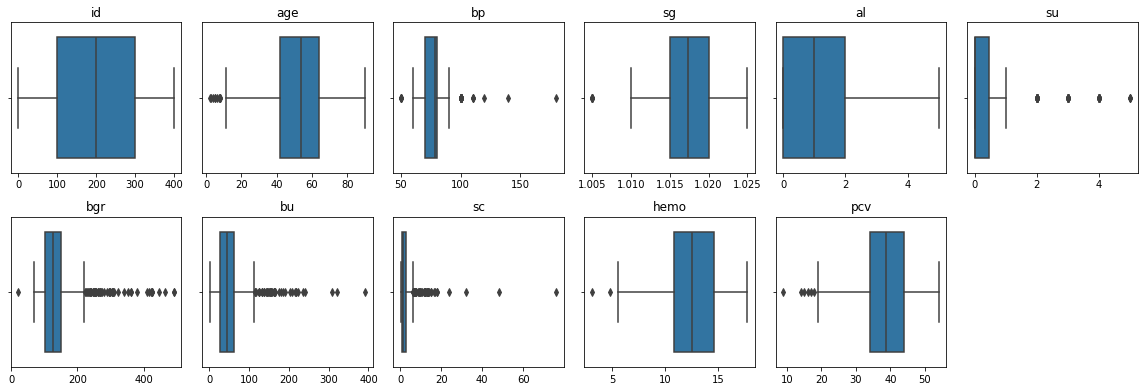

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(data[col])
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

According to the boxplot, there are some outliers in bp, sg, su, bgr, bu, sc, hemo and pcv. There are obvious extreme outliers in sc column, we can  use Winsorization to cap the extreme values:

c:\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


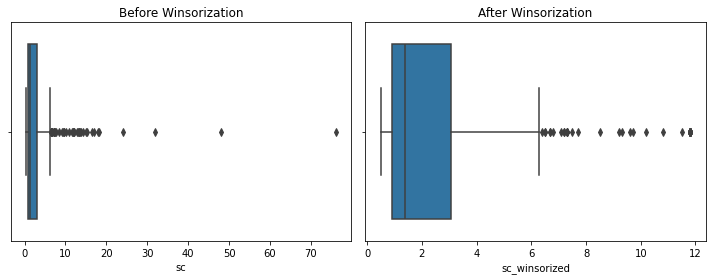

In [25]:
import numpy as np
lower_bound = data['sc'].quantile(0.05)
upper_bound = data['sc'].quantile(0.95)
data['sc_winsorized'] = np.where(data['sc'] < lower_bound, lower_bound,
                                 np.where(data['sc'] > upper_bound, upper_bound, data['sc']))
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['sc'])
plt.title('Before Winsorization')

plt.subplot(1, 2, 2)
sns.boxplot(data['sc_winsorized'])
plt.title('After Winsorization')

plt.tight_layout()
plt.show()

In [26]:
data = data.drop("sc", axis=1)

### 5. Association between variables

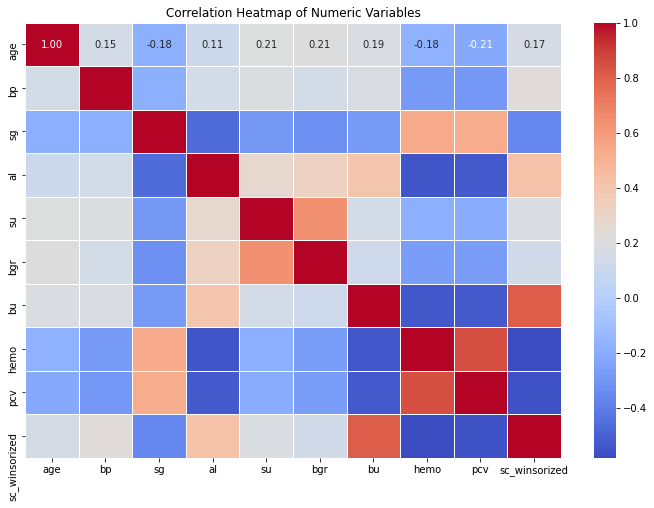

In [27]:
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).drop("id", axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [28]:
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).drop("id", axis=1).corr()
correlation_matrix

,age,bp,sg,al,su,bgr,bu,hemo,pcv,sc_winsorized
age,1.000000,0.148004,-0.180570,0.114764,0.207857,0.214410,0.187544,-0.175380,-0.211805,0.166199
bp,0.148004,1.000000,-0.182463,0.146593,0.200784,0.149100,0.183970,-0.279535,-0.292714,0.230103
sg,-0.180570,-0.182463,1.000000,-0.466698,-0.287993,-0.326339,-0.278568,0.531755,0.528437,-0.353882
al,0.114764,0.146593,-0.466698,1.000000,0.268070,0.326400,0.405778,-0.549697,-0.527242,0.425578
su,0.207857,0.200784,-0.287993,0.268070,1.000000,0.639186,0.152186,-0.191518,-0.202573,0.185913
bgr,0.214410,0.149100,-0.326339,0.326400,0.639186,1.000000,0.127489,-0.269149,-0.267580,0.137039
bu,0.187544,0.183970,-0.278568,0.405778,0.152186,0.127489,1.000000,-0.540641,-0.525982,0.809573
hemo,-0.175380,-0.279535,0.531755,-0.549697,-0.191518,-0.269149,-0.540641,1.000000,0.854962,-0.581086
pcv,-0.211805,-0.292714,0.528437,-0.527242,-0.202573,-0.267580,-0.525982,0.854962,1.000000,-0.559275
sc_winsorized,0.166199,0.230103,-0.353882,0.425578,0.185913,0.137039,0.809573,-0.581086,-0.559275,1.000000


The correlation matrix reveals various relationships among the variables. The specific gravity is moderate positively associated with the hemoglobin and acked cell volume. The albumin is moderate negatively associated with the hemoglobin and acked cell volume. The sugar is moderate positively associated with blood glucose random. The blood urea is strong positively associated with serum creatinine and moderate negatively associated with packed cell volum. The hemoglobin is strong positively associated with packed cell volume and moderate negatively associated with serum creatinine.

### 6. Variable Transformation

Draw histograms for all the numeric variables.

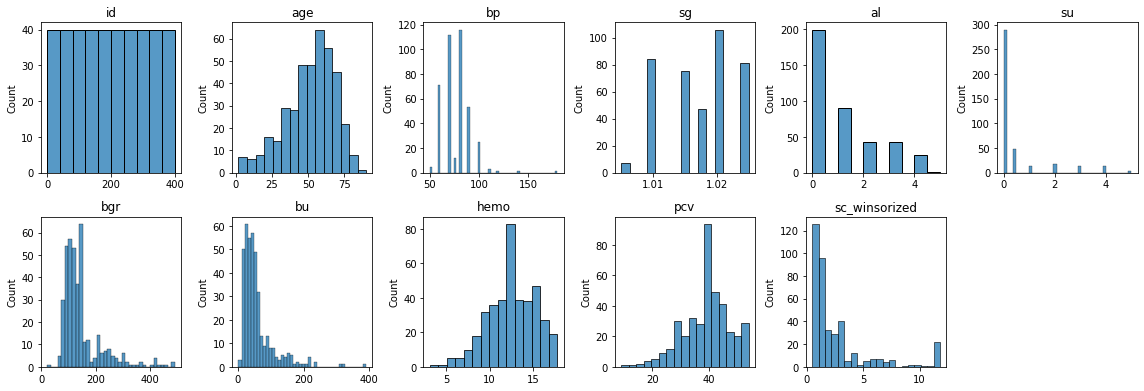

In [29]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 6, i)
    sns.histplot(data[col])
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

The distribution of tgr, bu and sc_winsoriezed are heavily right skewed, we can apply log transforamtion to these variabl

In [30]:
data["bgr_log"] = np.log(data["bgr"])
data["bu_log"] = np.log(data["bu"])
data["sc_log"] = np.log(data["sc_winsorized"])

### 7. Sub-group Analysis


Draw boxplot of numeric variable for the following categorical variables: pe,dm, pc and pcc.

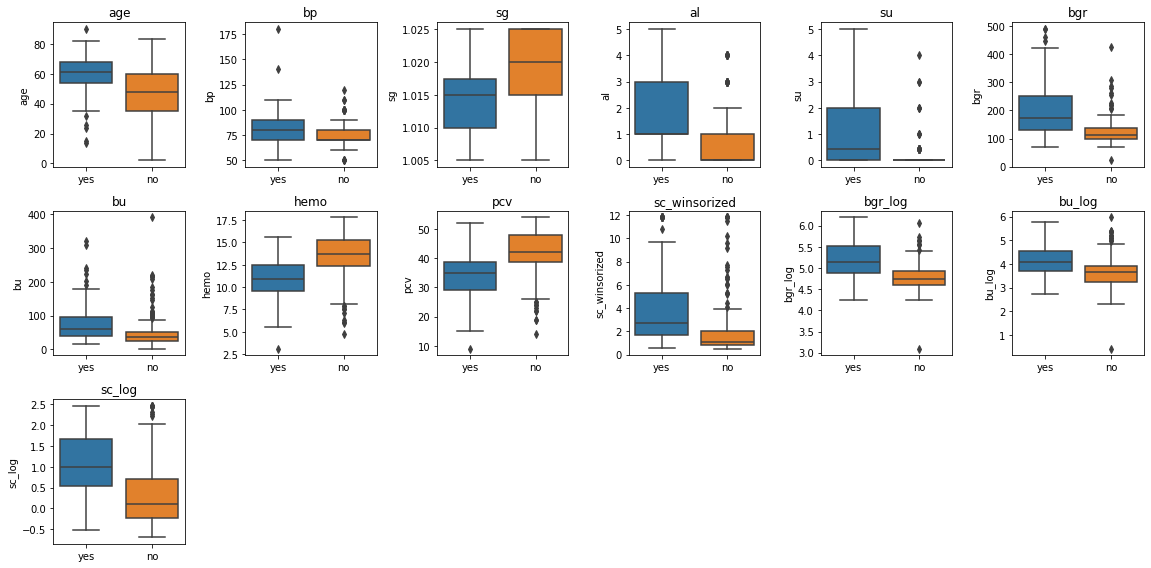

In [31]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).drop("id", axis=1).columns
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(data=data, x="dm", y=col)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

The figure suggests that the age, bp, sg, al, su, bgr, bu, hemo, pcv, sc all differs by dm.

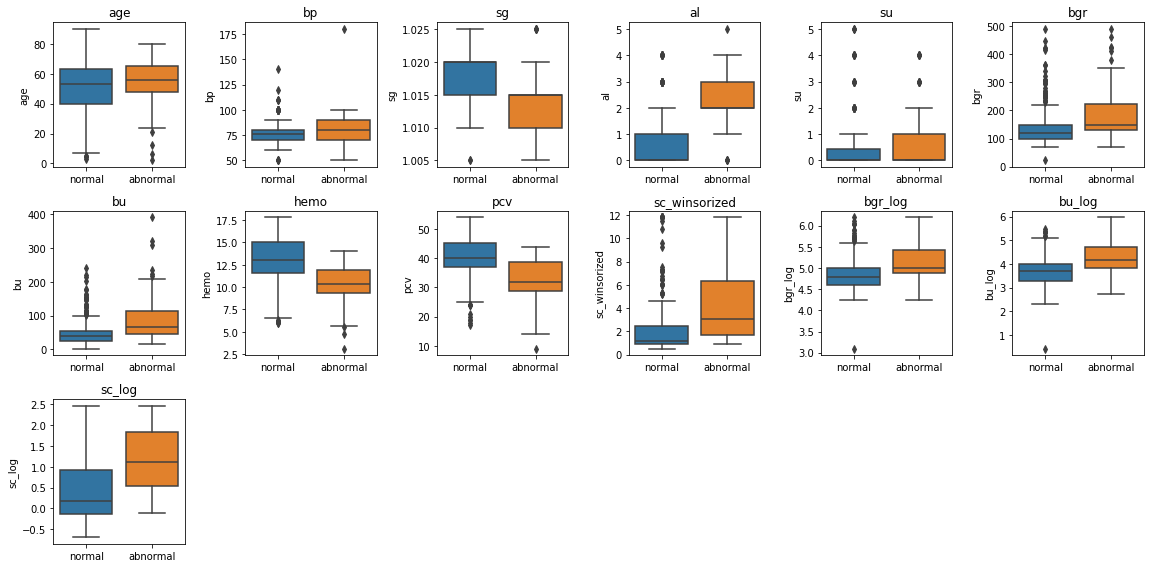

In [32]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).drop("id", axis=1).columns
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(data=data, x="pc", y=col)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

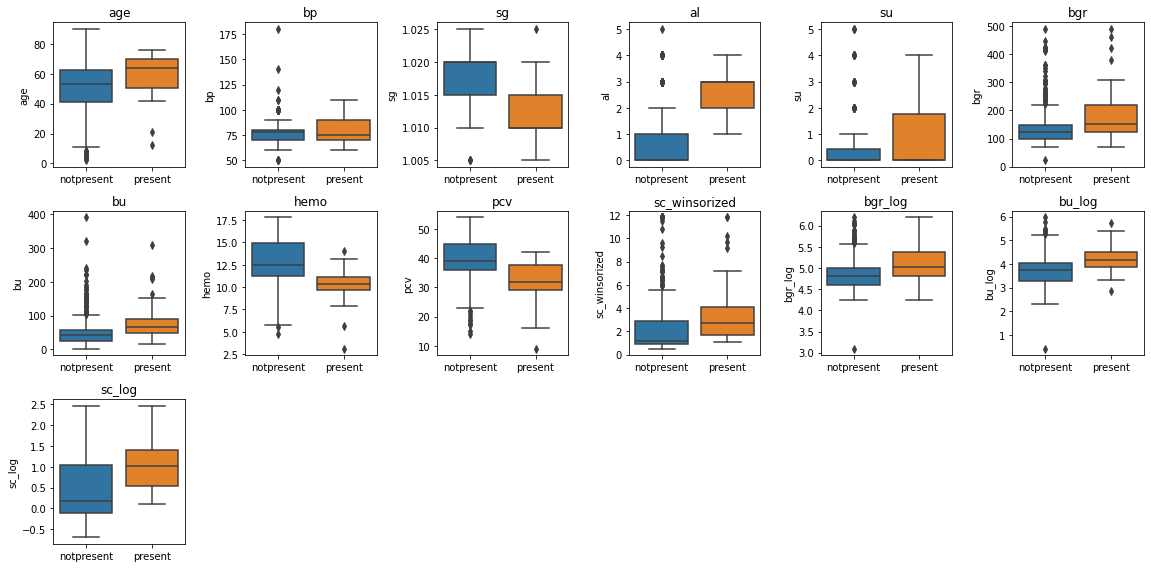

In [33]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).drop("id", axis=1).columns
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(data=data, x="pcc", y=col)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

All these plots suggest that the numeric variable have different avearge value for different dm,pc, pcc and pe.

### 8. Data Splitting

Split the the data into training data and test data, with a ratio to 7/3.

In [34]:
from sklearn.model_selection import train_test_split
X = data.drop(["id", "bgr", "bu", "sc_winsorized", "classification"], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = data["classification"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### 9. Classifier Choices

I will choose the Decision Tree and Random Forest.- 

Decision Tree Classifier: Decision trees are intuitive and easy to interpret models that partition the feature space based on simple decision rules. They are capable of capturing non-linear relationships and interactions between features- .


Random Forest Classifier: Random Forest can capture complex relationships between features and target variable, handle non-linearity, and provide robust performance even with minimal feature engineering.  Additionally, it can provide insights into feature importance, which may help in feature selection and understanding the underlying patterns in the datata.

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# initialize Decision Tree Classifier model
dt_model = DecisionTreeClassifier()

# fit Decision Tree Classifier model to the training data
dt_model.fit(X_train, y_train)

# initialize Random Forest Classifier model
rf_model = RandomForestClassifier()

# fit Random Forest Classifier model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier()

### 10. Feature Selection/Extraction

I will try to tune the parameters of the tree model here:

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# perform Grid Search Cross Validation
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)

best_dt_classifier.fit(X_train, y_train)
best_dt_classifier

DecisionTreeClassifier(random_state=42)

### 11. Performance Metrics

I will the following two metric to compare the classifiers:

- Accuracy: Accuracy is a measure of the overall correctness of the classifier across all classes. Accuracy is simple to interpret and understand, making it a popular metric for evaluating classifier performance.

- AUC: The Receiver Operating Characteristic (ROC) curve is a graphical representation of the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) for various threshold values.
The AUC quantifies the overall performance of the classifier across different threshold values, summarizing the ROC curve into a single value.
AUC ranges from 0 to 1, where a higher value indicates better classifier performance. An AUC of 0.5 represents a classifier that performs no better than random.


### 12.Classifier Comparison

In [42]:
from sklearn.metrics import accuracy_score, roc_auc_score

# predictions for decision tree model
dt_predictions = best_dt_classifier.predict(X_test)
dt_probabilities = best_dt_classifier.predict_proba(X_test)[:, 1]

# calculate accuracy and AUC for decision tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_auc = roc_auc_score(y_test, dt_probabilities)

# predictions for Random Forest Classifier model
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# calculate accuracy and AUC for Random Forest Classifier model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_auc = roc_auc_score(y_test, rf_probabilities)

# compare the performance of the two models
print("Decision Tree Model:")
print("Test Accuracy:", dt_accuracy)
print("Test AUC:", dt_auc)

print("\nRandom Forest Classifier Model:")
print("Test Accuracy:", rf_accuracy)
print("Test AUC:", rf_auc)

Decision Tree Model:
Test Accuracy: 0.975
Test AUC: 0.9752747252747253

Random Forest Classifier Model:
Test Accuracy: 1.0
Test AUC: 1.0


Both models perform exceptionally well on the test set, demonstrating high accuracy and perfect AUC scores. However, the Random Forest Classifier achieves slightly higher accuracy compared to the Decision Tree model. Nonetheless, both models exhibit excellent performance and are suitable choices depending on the specific requirements and considerations of the task at hand.

### 13. Interpretable Classifier Insight

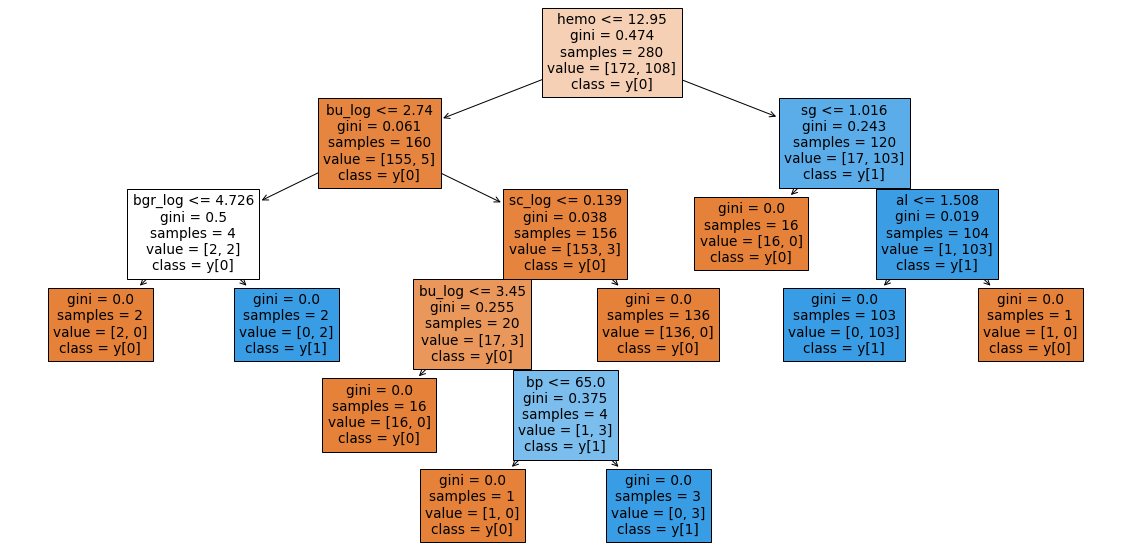

In [51]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_classifier, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()

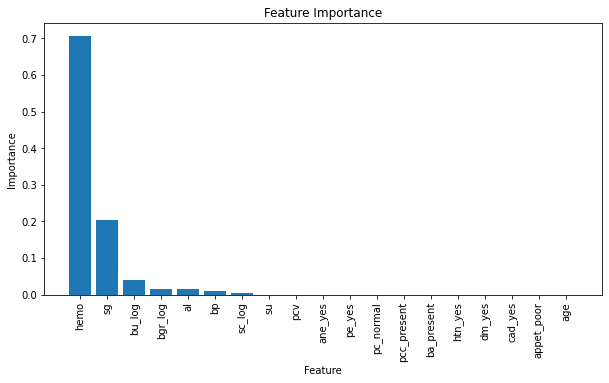

In [49]:
importances = best_dt_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]
names = [X_train.columns[i] for i in indices]
plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(names, importances[indices])
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

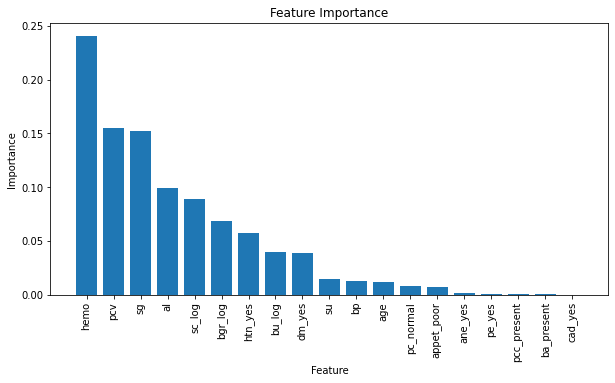

In [50]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]
names = [X_train.columns[i] for i in indices]
plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(names, importances[indices])
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

According to the bar charts above, we found that the top 5 most important predictors for the decision tree are : herno, sg, bu_log,bgr_log and al. And the top 5 most important predictors for the random forest model are: herno, pcv, sg, al and sc_log.

### 14. Team Contributions

Li Yang (400239987):

- Task 3: Dataset Overview
- Task 5: Missing Value Analysis and Handling
- Task 8: Data Splitting
- Task 10: Performance Metrics:

Tianmeng Ma (400324554):

- Task 4: Association Between Variables
- Task 6: Outlier Analysis
- Task 7: Sub-group Analysis
- Task 11: Feature Selection/Extraction

Sirui Sheng (400207992):

- Task 1: Classification Problem Identification
- Task 2: Variable Transformation
- Task 9: Classifier Choices
- Task 12: 